## Road Map:

* [Step 0](#step0): Import Datasets.

* [Step 1](#step1): Clean Datasets (The data needs to be cleaned; many rows contain missing data, and there may be erroneous data identifiable as outliers).

* [Step 2](#step2): A quick visualization with *Seaborn*.

* [Step 3](#step3): At First, We applied several Supervised Machine Learning (SML) techniques on the data for classification purpose.

* [Step 4](#step4): Next, We experimented with different topologies, optimizers, and hyperparameters for different models.

* [Step 5](#step5):Test the Modals





# Step 0: Import Datasets
    We start by importing the 'ASD_data.csv' file into a Pandas dataframe and take a look at it.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from time import time
from IPython.display import display # Allows the use of display() for DataFrames


# Pretty display for notebooks
%matplotlib inline


data = pd.read_csv('ASD_data.csv')

data.head(n=5)

,id,A1,A2,A3,A4,A5,A6,A7,A8,A9,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class
0,1,1,1,1,1,0,0,1,1,0,...,f,White-European,no,no,United States,no,6,18 and more,Self,NO
1,2,1,1,0,1,0,0,0,1,0,...,m,Latino,no,yes,Brazil,no,5,18 and more,Self,NO
2,3,1,1,0,1,1,0,1,1,1,...,m,Latino,yes,yes,Spain,no,8,18 and more,Parent,YES
3,4,1,1,0,1,0,0,1,1,0,...,f,White-European,no,yes,United States,no,6,18 and more,Self,NO
4,5,1,0,0,0,0,0,0,1,0,...,f,?,no,no,Egypt,no,2,18 and more,?,NO


In [2]:
# Total number of records
n_records = len(data.index)

# TODO: Number of records where individual's with ASD
n_asd_yes = len(data[data['Class'] == 'YES'])

# TODO: Number of records where individual's with no ASD
n_asd_no = len(data[data['Class'] == 'NO'])

# TODO: Percentage of individuals whose are with ASD
yes_percent = float(n_asd_yes) / n_records *100

# Print the results
print ("Total number of records: {}".format(n_records))
print ("Individuals diagonised with ASD: {}".format(n_asd_yes))
print ("Individuals not diagonised with ASD: {}".format(n_asd_no))
print ("Percentage of individuals diagonised with ASD: {:.2f}%".format(yes_percent))

Total number of records: 704
Individuals diagonised with ASD: 189
Individuals not diagonised with ASD: 515
Percentage of individuals diagonised with ASD: 26.85%


**Preparing the Data**
Before data can be used as input for machine learning algorithms, it must be cleaned, formatted, and maybe even restructured — this is typically known as preprocessing. Unfortunately, for this dataset, there are many invalid or missing entries(?) we must deal with, moreover, there are some qualities about certain features that must be adjusted. This preprocessing can help tremendously with the outcome and predictive power of nearly all learning algorithms.

We use the optional parmaters in read_csv to convert missing data (indicated by a ?) into NaN, and to add the appropriate column names ():

In [3]:
asd_data = pd.read_csv('ASD_data.csv', na_values=['?']) #replacing '?' with NaN.
asd_data.head(n=5)

,id,A1,A2,A3,A4,A5,A6,A7,A8,A9,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class
0,1,1,1,1,1,0,0,1,1,0,...,f,White-European,no,no,United States,no,6,18 and more,Self,NO
1,2,1,1,0,1,0,0,0,1,0,...,m,Latino,no,yes,Brazil,no,5,18 and more,Self,NO
2,3,1,1,0,1,1,0,1,1,1,...,m,Latino,yes,yes,Spain,no,8,18 and more,Parent,YES
3,4,1,1,0,1,0,0,1,1,0,...,f,White-European,no,yes,United States,no,6,18 and more,Self,NO
4,5,1,0,0,0,0,0,0,1,0,...,f,NaN,no,no,Egypt,no,2,18 and more,NaN,NO


In [4]:
asd_data.describe()

,id,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,age,result
count,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,702.000000,704.000000
mean,352.500000,0.721591,0.453125,0.457386,0.495739,0.498580,0.284091,0.417614,0.649148,0.323864,0.573864,29.206553,4.875000
std,203.371581,0.448535,0.498152,0.498535,0.500337,0.500353,0.451301,0.493516,0.477576,0.468281,0.494866,9.710286,2.501493
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000
25%,176.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,3.000000
50%,352.500000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,27.000000,4.000000
75%,528.250000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.000000,7.000000
max,704.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,64.000000,10.000000


# Step 1: Clean Datasets

In [5]:
asd_data.loc[(asd_data['age'].isnull()) |(asd_data['gender'].isnull()) |(asd_data['ethnicity'].isnull()) 
|(asd_data['jundice'].isnull())|(asd_data['austim'].isnull()) |(asd_data['contry_of_res'].isnull())
            |(asd_data['used_app_before'].isnull())|(asd_data['result'].isnull())|(asd_data['age_desc'].isnull())
            |(asd_data['relation'].isnull())]  #This selects the rows with missing data.

,id,A1,A2,A3,A4,A5,A6,A7,A8,A9,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class
4,5,1,0,0,0,0,0,0,1,0,...,f,NaN,no,no,Egypt,no,2,18 and more,NaN,NO
12,13,0,1,1,1,1,1,0,0,1,...,f,NaN,no,no,Bahamas,no,6,Less than 18,NaN,NO
13,14,1,0,0,0,0,0,1,1,0,...,m,NaN,no,no,Austria,no,4,Less than 18,NaN,NO
14,15,1,0,0,0,0,0,1,1,0,...,f,NaN,no,no,Argentina,no,4,Less than 18,NaN,NO
19,20,0,0,0,0,0,0,1,1,0,...,m,NaN,yes,no,United Arab Emirates,no,3,18 and more,NaN,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
652,653,0,0,0,0,0,0,0,0,0,...,f,NaN,no,no,United States,no,1,18 and more,NaN,NO
658,659,0,0,1,1,0,0,1,0,0,...,m,NaN,no,no,Azerbaijan,no,3,18 and more,NaN,NO
659,660,1,1,1,1,1,1,0,0,1,...,m,NaN,no,no,Pakistan,no,8,18 and more,NaN,YES
666,667,0,0,0,0,0,0,0,1,0,...,m,NaN,no,no,Iraq,no,1,18 and more,NaN,NO


In [6]:
asd_data.dropna(inplace=True)  #delete rows with missing data. 
asd_data.describe()

,id,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,age,result
count,609.000000,609.000000,609.000000,609.000000,609.000000,609.000000,609.000000,609.000000,609.000000,609.000000,609.000000,609.000000,609.000000
mean,349.725780,0.740558,0.469622,0.481117,0.520525,0.525452,0.307061,0.428571,0.665025,0.341544,0.597701,29.648604,5.077176
std,207.856238,0.438689,0.499487,0.500054,0.499989,0.499762,0.461654,0.495278,0.472370,0.474617,0.490765,9.692034,2.522717
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000
25%,166.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,3.000000
50%,329.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,27.000000,5.000000
75%,533.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.000000,7.000000
max,704.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,64.000000,10.000000


Let's check out the data types of all our features including the target feature. Moreover, lets count the total number of instances and the target-class distribution.

In [7]:
# Reminder of the features:
print(asd_data.dtypes)


# Total number of records in clean dataset
n_records = len(asd_data.index)

# TODO: Number of records where individual's with ASD in the clean dataset
n_asd_yes = len(asd_data[asd_data['Class'] == 'YES'])

# TODO: Number of records where individual's with no ASD in the clean dataset
n_asd_no = len(asd_data[asd_data['Class'] == 'NO'])

# Print the results
print ("Total number of records: {}".format(n_records))
print ("Individuals diagonised with ASD: {}".format(n_asd_yes))
print ("Individuals not diagonised with ASD: {}".format(n_asd_no))

id                   int64
A1                   int64
A2                   int64
A3                   int64
A4                   int64
A5                   int64
A6                   int64
A7                   int64
A8                   int64
A9                   int64
A10                  int64
age                float64
gender              object
ethnicity           object
jundice             object
austim              object
contry_of_res       object
used_app_before     object
result               int64
age_desc            object
relation            object
Class               object
dtype: object
Total number of records: 609
Individuals diagonised with ASD: 180
Individuals not diagonised with ASD: 429


# Step 2: A quick visualization with Seaborn

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid", color_codes=True)

<AxesSubplot:xlabel='jundice', ylabel='result'>

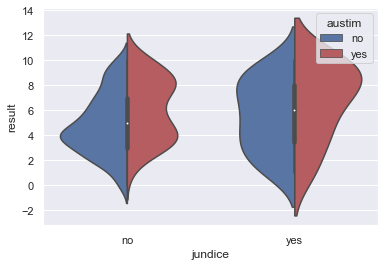

In [9]:
# Draw a nested violinplot and split the violins for easier comparison #hue- takes column name for color encoding.
sns.violinplot(x="jundice", y="result", hue="austim", data=asd_data, split=True,
                inner="box", palette={'yes': "r", 'no': "b"})


<AxesSubplot:xlabel='jundice', ylabel='result'>

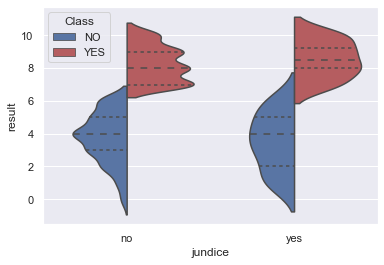

In [10]:
# Draw a nested violinplot and split the violins for easier comparison
sns.violinplot(x="jundice", y="result", hue="Class", data=asd_data, split=True,
                inner="quart", palette={'YES': "r", 'NO': "b"})


<AxesSubplot:xlabel='gender', ylabel='result'>

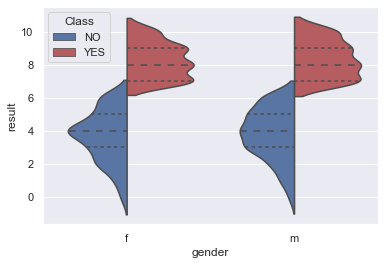

In [11]:
# Draw a nested violinplot and split the violins for easier comparison
sns.violinplot(x="gender", y="result", hue="Class", data=asd_data, split=True,
                inner="quart", palette={'YES': "r", 'NO': "b"})
#sns.despine(left=True)

C:\Users\Snehal Rajapurkar\anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Snehal Rajapurkar\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 15.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Snehal Rajapurkar\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 27.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


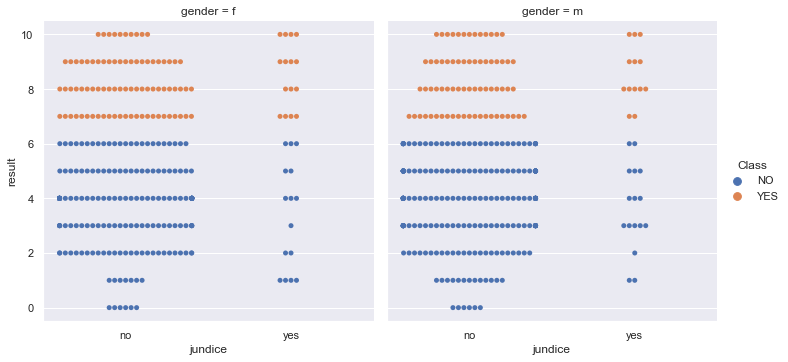

In [12]:
sns.factorplot(x="jundice", y="result", hue="Class", col="gender", data=asd_data, kind="swarm");

C:\Users\Snehal Rajapurkar\anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Snehal Rajapurkar\anaconda3\lib\site-packages\seaborn\categorical.py:3720: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


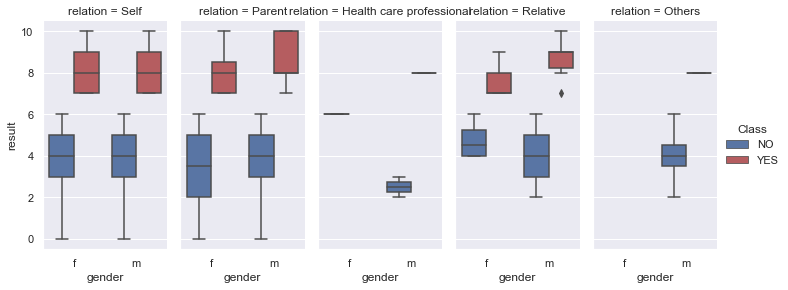

In [13]:
sns.factorplot(x="gender", y="result", hue="Class",
               col="relation", data=asd_data, kind="box", size=4, aspect=.5, palette={'YES': "r", 'NO': "b"});

C:\Users\Snehal Rajapurkar\anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Snehal Rajapurkar\anaconda3\lib\site-packages\seaborn\categorical.py:3720: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


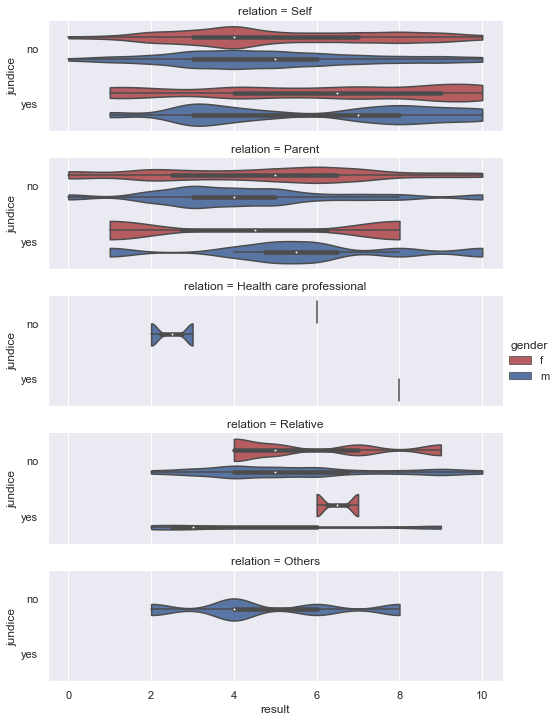

In [14]:
#multiploting
g = sns.factorplot(x="result", y="jundice",
                   hue="gender", row="relation",
                   data=asd_data,
                    orient="h", size=2, aspect=3.5, palette={'f': "r", 'm': "b"},
                  kind="violin", dodge=True, cut=0, bw=.2)

In [15]:
asd_data.tail()

,id,A1,A2,A3,A4,A5,A6,A7,A8,A9,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class
698,699,1,1,1,1,1,1,1,1,1,...,f,Pasifika,no,no,Australia,no,10,18 and more,Self,YES
699,700,0,1,0,1,1,0,1,1,1,...,f,White-European,no,no,Russia,no,7,18 and more,Self,YES
700,701,1,0,0,0,0,0,0,1,0,...,m,Hispanic,no,no,Mexico,no,3,18 and more,Parent,NO
702,703,1,0,0,1,1,0,1,0,1,...,m,South Asian,no,no,Pakistan,no,6,18 and more,Self,NO
703,704,1,0,1,1,1,0,1,1,1,...,f,White-European,no,no,Cyprus,no,8,18 and more,Self,YES


In [16]:
asd_data.Class .unique()

array(['NO', 'YES'], dtype=object)

In [17]:
asd_data['Class'].replace('NO', 0, inplace=True)
asd_data['Class'].replace('YES', 1, inplace=True)

In [18]:
asd_data.head()

,id,A1,A2,A3,A4,A5,A6,A7,A8,A9,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class
0,1,1,1,1,1,0,0,1,1,0,...,f,White-European,no,no,United States,no,6,18 and more,Self,0
1,2,1,1,0,1,0,0,0,1,0,...,m,Latino,no,yes,Brazil,no,5,18 and more,Self,0
2,3,1,1,0,1,1,0,1,1,1,...,m,Latino,yes,yes,Spain,no,8,18 and more,Parent,1
3,4,1,1,0,1,0,0,1,1,0,...,f,White-European,no,yes,United States,no,6,18 and more,Self,0
5,6,1,1,1,1,1,0,1,1,1,...,m,Others,yes,no,United States,no,9,18 and more,Self,1


In [19]:
asd_data.relation.unique()

array(['Self', 'Parent', 'Health care professional', 'Relative', 'Others'],
      dtype=object)

In [20]:

asd_data['relation'].replace('Health care professional', 0, inplace=True)
asd_data['relation'].replace('Others', 1, inplace=True)
asd_data['relation'].replace('Parent', 2, inplace=True)
asd_data['relation'].replace('Relative', 3, inplace=True)
asd_data['relation'].replace('Self', 4, inplace=True)

In [21]:
asd_data.age_desc.unique()

array(['18 and more', 'Less than 18'], dtype=object)

In [22]:
asd_data['age_desc'].replace('18 and more', 1, inplace=True)
asd_data['age_desc'].replace('Less than 18', 0, inplace=True)

In [23]:
asd_data.used_app_before.unique()

array(['no', 'yes'], dtype=object)

In [24]:
asd_data['used_app_before'].replace('no', 0, inplace=True)
asd_data['used_app_before'].replace('yes', 1, inplace=True)

In [25]:
asd_data.contry_of_res.unique()

array(['United States', 'Brazil', 'Spain', 'New Zealand', 'Bahamas',
       'Burundi', 'Jordan', 'Ireland', 'United Arab Emirates',
       'Afghanistan', 'United Kingdom', 'South Africa', 'Italy',
       'Pakistan', 'Egypt', 'Bangladesh', 'Chile', 'France', 'China',
       'Australia', 'Canada', 'Saudi Arabia', 'Netherlands', 'Romania',
       'Sweden', 'Tonga', 'Oman', 'India', 'Philippines', 'Sri Lanka',
       'Sierra Leone', 'Ethiopia', 'Viet Nam', 'Iran', 'Costa Rica',
       'Germany', 'Mexico', 'Armenia', 'Iceland', 'Nicaragua', 'Austria',
       'Russia', 'AmericanSamoa', 'Uruguay', 'Ukraine', 'Serbia',
       'Portugal', 'Malaysia', 'Ecuador', 'Niger', 'Belgium', 'Bolivia',
       'Aruba', 'Finland', 'Turkey', 'Nepal', 'Indonesia', 'Angola',
       'Czech Republic', 'Cyprus'], dtype=object)

In [26]:
asd_data['contry_of_res'].replace('United States', 0, inplace=True)
asd_data['contry_of_res'].replace('Brazil', 1, inplace=True)
asd_data['contry_of_res'].replace('Spain', 2, inplace=True)
asd_data['contry_of_res'].replace('New Zealand', 3, inplace=True)
asd_data['contry_of_res'].replace('Bahamas', 4, inplace=True)
asd_data['contry_of_res'].replace('Burundi', 5, inplace=True)
asd_data['contry_of_res'].replace('Jordan', 6, inplace=True)
asd_data['contry_of_res'].replace('Ireland', 7, inplace=True)
asd_data['contry_of_res'].replace('United Arab Emirates', 8, inplace=True)
asd_data['contry_of_res'].replace('Afghanistan', 9, inplace=True)
asd_data['contry_of_res'].replace('United Kingdom', 10, inplace=True)
asd_data['contry_of_res'].replace('South Africa', 11, inplace=True)
asd_data['contry_of_res'].replace('Italy', 12, inplace=True)
asd_data['contry_of_res'].replace('Pakistan', 13, inplace=True)
asd_data['contry_of_res'].replace('Egypt', 14, inplace=True)
asd_data['contry_of_res'].replace('Bangladesh', 15, inplace=True)
asd_data['contry_of_res'].replace('Chile', 16, inplace=True)
asd_data['contry_of_res'].replace('France', 17, inplace=True)
asd_data['contry_of_res'].replace('China', 18, inplace=True)
asd_data['contry_of_res'].replace('Australia', 19, inplace=True)
asd_data['contry_of_res'].replace('Canada', 20, inplace=True)
asd_data['contry_of_res'].replace('Saudi Arabia', 21, inplace=True)
asd_data['contry_of_res'].replace('Netherlands', 22, inplace=True)
asd_data['contry_of_res'].replace('Romania', 23, inplace=True)
asd_data['contry_of_res'].replace('Sweden', 24, inplace=True)
asd_data['contry_of_res'].replace('Tonga', 25, inplace=True)
asd_data['contry_of_res'].replace('Oman', 26, inplace=True)
asd_data['contry_of_res'].replace('India', 27, inplace=True)
asd_data['contry_of_res'].replace('Philippines', 28, inplace=True)
asd_data['contry_of_res'].replace('Sri Lanka', 29, inplace=True)
asd_data['contry_of_res'].replace('Sierra Leone', 30, inplace=True)
asd_data['contry_of_res'].replace('Ethiopia', 31, inplace=True)
asd_data['contry_of_res'].replace('Viet Nam', 32, inplace=True)
asd_data['contry_of_res'].replace('Iran', 33, inplace=True)
asd_data['contry_of_res'].replace('Costa Rica', 34, inplace=True)
asd_data['contry_of_res'].replace('Germany', 35, inplace=True)
asd_data['contry_of_res'].replace('Mexico', 36, inplace=True)
asd_data['contry_of_res'].replace('Armenia', 37, inplace=True)
asd_data['contry_of_res'].replace('Iceland', 38, inplace=True)
asd_data['contry_of_res'].replace('Nicaragua', 39, inplace=True)
asd_data['contry_of_res'].replace('Austria', 40, inplace=True)
asd_data['contry_of_res'].replace('Russia', 41, inplace=True)
asd_data['contry_of_res'].replace('AmericanSamoa', 42, inplace=True)
asd_data['contry_of_res'].replace('Uruguay', 43, inplace=True)
asd_data['contry_of_res'].replace('Ukraine', 44, inplace=True)
asd_data['contry_of_res'].replace('Serbia', 45, inplace=True)
asd_data['contry_of_res'].replace('Portugal', 46, inplace=True)
asd_data['contry_of_res'].replace('Malaysia', 47, inplace=True)
asd_data['contry_of_res'].replace('Ecuador', 48, inplace=True)
asd_data['contry_of_res'].replace('Niger', 49, inplace=True)
asd_data['contry_of_res'].replace('Belgium', 50, inplace=True)
asd_data['contry_of_res'].replace('Bolivia', 51, inplace=True)
asd_data['contry_of_res'].replace('Aruba', 52, inplace=True)
asd_data['contry_of_res'].replace('Finland', 53, inplace=True)
asd_data['contry_of_res'].replace('Turkey', 54, inplace=True)
asd_data['contry_of_res'].replace('Nepal', 55, inplace=True)
asd_data['contry_of_res'].replace('Indonesia', 56, inplace=True)
asd_data['contry_of_res'].replace('Angola', 57, inplace=True)
asd_data['contry_of_res'].replace('Czech Republic', 58, inplace=True)
asd_data['contry_of_res'].replace('Cyprus', 59, inplace=True)


In [27]:
asd_data.austim.unique()

array(['no', 'yes'], dtype=object)

In [28]:
asd_data['austim'].replace('no', 0, inplace=True)
asd_data['austim'].replace('yes', 1, inplace=True)

In [29]:
asd_data.jundice.unique()

array(['no', 'yes'], dtype=object)

In [30]:
asd_data['jundice'].replace('no', 0, inplace=True)
asd_data['jundice'].replace('yes', 1, inplace=True)

In [31]:
asd_data.ethnicity.unique()

array(['White-European', 'Latino', 'Others', 'Black', 'Asian',
       'Middle Eastern ', 'Pasifika', 'South Asian', 'Hispanic',
       'Turkish', 'others'], dtype=object)

In [32]:
asd_data['ethnicity'].replace('White-European', 0, inplace=True)
asd_data['ethnicity'].replace('Latino', 1, inplace=True)
asd_data['ethnicity'].replace('Others', 2, inplace=True)
asd_data['ethnicity'].replace('Black', 3, inplace=True)
asd_data['ethnicity'].replace('Asian', 4, inplace=True)
asd_data['ethnicity'].replace('Middle Eastern ', 5, inplace=True)
asd_data['ethnicity'].replace('Pasifika', 6, inplace=True)
asd_data['ethnicity'].replace('South Asian', 7, inplace=True)
asd_data['ethnicity'].replace('Hispanic', 8, inplace=True)
asd_data['ethnicity'].replace('Turkish', 9, inplace=True)
asd_data['ethnicity'].replace('others', 2, inplace=True)

In [33]:
asd_data.gender.unique()

array(['f', 'm'], dtype=object)

In [34]:
asd_data['gender'].replace('f', 0, inplace=True)
asd_data['gender'].replace('m', 1, inplace=True)

In [35]:
asd_data.head()

,id,A1,A2,A3,A4,A5,A6,A7,A8,A9,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class
0,1,1,1,1,1,0,0,1,1,0,...,0,0,0,0,0,0,6,1,4,0
1,2,1,1,0,1,0,0,0,1,0,...,1,1,0,1,1,0,5,1,4,0
2,3,1,1,0,1,1,0,1,1,1,...,1,1,1,1,2,0,8,1,2,1
3,4,1,1,0,1,0,0,1,1,0,...,0,0,0,1,0,0,6,1,4,0
5,6,1,1,1,1,1,0,1,1,1,...,1,2,1,0,0,0,9,1,4,1


In [36]:
# Split the data into features and target label, converting dataframe into arrays to wrk with scikit_liearn.
asd_class = asd_data['Class']
features_raw = asd_data[['age', 'gender', 'ethnicity', 'jundice', 'austim', 'contry_of_res', 'result',
                      'relation','A1','A2','A3','A4','A5','A6','A7','A8',
                      'A9','A10']]

In [37]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
numerical = ['age', 'result', 'contry_of_res', 'ethnicity' ]

features_final = pd.DataFrame(data = features_raw)
features_final[numerical] = scaler.fit_transform(features_raw[numerical])
features_final
# Show an example of a record with scaling applied
display(features_final.head(n = 5))

,age,gender,ethnicity,jundice,austim,contry_of_res,result,relation,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10
0,0.191489,0,0.000000,0,0,0.000000,0.6,4,1,1,1,1,0,0,1,1,0,0
1,0.148936,1,0.111111,0,1,0.016949,0.5,4,1,1,0,1,0,0,0,1,0,1
2,0.212766,1,0.111111,1,1,0.033898,0.8,2,1,1,0,1,1,0,1,1,1,1
3,0.382979,0,0.000000,0,1,0.000000,0.6,4,1,1,0,1,0,0,1,1,0,1
5,0.404255,1,0.222222,1,0,0.000000,0.9,4,1,1,1,1,1,0,1,1,1,1


In [38]:
features_final.isnull().mean()

age              0.0
gender           0.0
ethnicity        0.0
jundice          0.0
austim           0.0
contry_of_res    0.0
result           0.0
relation         0.0
A1               0.0
A2               0.0
A3               0.0
A4               0.0
A5               0.0
A6               0.0
A7               0.0
A8               0.0
A9               0.0
A10              0.0
dtype: float64

**Shuffle and Split Data**

Now all categorical variables have been converted into numerical features, and all numerical features have been normalized. As always, We will now split the data (both features and their labels) into training and test sets. 80% of the data will be used for training and 20% for testing.

In [39]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(features_final, asd_class, train_size=0.80, random_state=1)


# Show the results of the split
print ("Training set has {} samples.".format(X_train.shape[0]))
print ("Testing set has {} samples.".format(X_test.shape[0]))
#asd_data

Training set has 487 samples.
Testing set has 122 samples.


# Step 3: Models
**Supervised Learning Models**
We have applied the following supervised learning models in this project which are currently available in scikit-learn.

(1) Decision Trees

(2) Random Forest

(3) Support Vector Machines (SVM)

(4) K-Nearest Neighbors (KNeighbors)

(5) Gaussian Naive Bayes (GaussianNB)

(6) Logistic Regression (LR)

(7) Linear Discriminant Analysis (LDA)

(8) Quadratic Discriminant Analysis (QDA)
 


<a id='2'></a>
## (1) Decision Trees
We start with creating a DecisionTreeClassifier and fit it to the training data.

In [40]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

dectree = DecisionTreeClassifier(random_state=1)  #crate a DT and save it as dectree

# Train the classifier on the training set
dectree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [41]:
dectree = dectree.fit(X_train, y_train)

<a id='2'></a>
## Predictions and Evaluation of DT Model

In [42]:
predictions_dectree = dectree.predict(X_test)
acc_dectree = accuracy_score(y_true = y_test, y_pred = predictions_dectree )
print("Overall accuracy of DT using test-set is : %f" %(acc_dectree*100))

Overall accuracy of DT using test-set is : 100.000000


In [43]:
print(classification_report(y_test, predictions_dectree))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        79
           1       1.00      1.00      1.00        43

    accuracy                           1.00       122
   macro avg       1.00      1.00      1.00       122
weighted avg       1.00      1.00      1.00       122



In [44]:
print(confusion_matrix(y_test, predictions_dectree))

[[79  0]
 [ 0 43]]


**Depiction of Decision Tree algorithm**

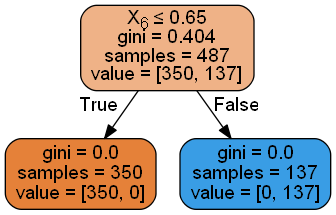

In [45]:

import pydotplus 
import graphviz

from IPython.display import Image
from sklearn.tree import export_graphviz
from six import StringIO
import pydotplus

#create DOT data
dot_data = tree.export_graphviz(dectree,
                                out_file=None,
                                filled=True,
                                rounded=True,
                                special_characters=True)  

#create graph
graph = pydotplus.graph_from_dot_data(dot_data)  

from IPython.display import Image 

#show graph
Image(graph.create_png()) 
 

**Evaluating Model Performance**

**Metrics**

We can use F-beta score as a metric that considers both precision and recall:

𝐹𝛽=(1+𝛽2)⋅(𝑝𝑟𝑒𝑐𝑖𝑠𝑖𝑜𝑛⋅𝑟𝑒𝑐𝑎𝑙𝑙/(𝛽2⋅𝑝𝑟𝑒𝑐𝑖𝑠𝑖𝑜𝑛)+𝑟𝑒𝑐𝑎𝑙𝑙)
 
In particular, when  𝛽=0.5 , more emphasis is placed on precision. This is called the F 0.5  score (or F-score for simplicity).

**Note** : Recap of accuracy, precision, recall

**Accuracy** measures how often the classifier makes the correct prediction. It’s the ratio of the number of correct predictions to the total number of predictions (the number of test data points).

**Precision** tells us what proportion of messages we classified as spam, actually were spam. It is a ratio of true positives(words classified as spam, and which are actually spam) to all positives(all words classified as spam, irrespective of whether that was the correct classificatio), in other words it is the ratio of

[True Positives/(True Positives + False Positives)]

**Recall (sensitivity)** tells us what proportion of messages that actually were spam were classified by us as spam. It is a ratio of true positives(words classified as spam, and which are actually spam) to all the words that were actually spam, in other words it is the ratio of

[True Positives/(True Positives + False Negatives)]

In [46]:
# make class predictions for the testing set
y_pred_class = dectree.predict(X_test)

In [47]:
# print the first 25 true and predicted responses
print('True:', y_test.values[0:25])
print('False:', y_pred_class[0:25])

True: [1 0 0 1 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 0]
False: [1 0 0 1 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 0]


In [48]:
from sklearn import metrics
# IMPORTANT: first argument is true values, second argument is predicted values
# this produces a 2x2 numpy array (matrix)
#print(metrics.confusion_matrix(y_test, y_pred_class))

# save confusion matrix and slice into four pieces
confusion = metrics.confusion_matrix(y_test, y_pred_class)
print(confusion)
#[row, column]
TP = confusion[1, 1]    #43
TN = confusion[0, 0]    #79
FP = confusion[0, 1]    #0
FN = confusion[1, 0]    #0

[[79  0]
 [ 0 43]]


**Metrics computed from a confusion matrix**

**Classification Accuracy** : Overall, how often is the classifier correct?

In [49]:
# use float to perform true division, not integer division
print((TP + TN) / float(TP + TN + FP + FN))

1.0


**Classification Error** : Overall, how often is the classifier incorrect?

In [50]:
classification_error = (FP + FN) / float(TP + TN + FP + FN)

print(classification_error)

0.0


**Sensitivity** : When the actual value is positive, how often is the prediction correct?

In [51]:
sensitivity = TP / float(FN + TP)

print(sensitivity)
print(metrics.recall_score(y_test, y_pred_class))

1.0
1.0


**Specificity**: When the actual value is negative, how often is the prediction correct?

In [52]:
specificity = TN / (TN + FP)

print(specificity)

1.0


**False Positive Rate** : When the actual value is negative, how often is the prediction incorrect?

In [53]:
false_positive_rate = FP / float(TN + FP)

print(false_positive_rate)
#print(1 - specificity)

0.0


**Precision** : When a positive value is predicted, how often is the prediction correct?

In [54]:
precision = TP / float(TP + FP)

#print(precision)
print(metrics.precision_score(y_test, y_pred_class))

1.0


### Cross-validation:

Now instead of a single train/test split, We use K-Fold cross validation to get a better measure of your model's accuracy (K=10).


In [55]:
from sklearn.model_selection import cross_val_score

dectree = DecisionTreeClassifier(random_state=1)

cv_scores = cross_val_score(dectree, features_final, asd_class, cv=10)

cv_scores.mean()

1.0

### AUC Score: 

AUC is the percentage of the ROC plot that is underneath the curve

In [56]:
# calculate cross-validated AUC
from sklearn.model_selection import cross_val_score
cross_val_score(dectree, features_final, asd_class, cv=10, scoring='roc_auc').mean()

1.0

### F-beta Score:

In [57]:
dectree.fit(X_train, y_train)
from sklearn.metrics import fbeta_score
predictions_test = dectree.predict(X_test)
fbeta_score(y_test, predictions_test, average='binary', beta=0.5)

1.0

---
<a id='2'></a>
## (2) Random Forest

Now I apply a **RandomForestClassifier** instead to see whether it performs better.

In [58]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
ranfor = RandomForestClassifier(n_estimators=5, random_state=1)
cv_scores = cross_val_score(ranfor, features_final, asd_class, cv=10)
cv_scores.mean()

0.9967213114754099

In [59]:
ranfor = ranfor.fit(X_train, y_train)

## <a id='2'></a>
## Predictions and Evaluation of RF Model

In [60]:
predictions_rf = ranfor.predict(X_test)
acc_rf = accuracy_score(y_true = y_test, y_pred = predictions_rf )
print("Overall accuracy of RFM using test-set is : %f" %(acc_rf*100))

Overall accuracy of RFM using test-set is : 99.180328


In [61]:
print(classification_report(y_test, predictions_rf))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99        79
           1       1.00      0.98      0.99        43

    accuracy                           0.99       122
   macro avg       0.99      0.99      0.99       122
weighted avg       0.99      0.99      0.99       122



In [62]:
print(confusion_matrix(y_test, predictions_rf))

[[79  0]
 [ 1 42]]


AUC Score: AUC is the percentage of the ROC plot that is underneath the curve

In [63]:
# calculate cross-validated AUC
from sklearn.model_selection import cross_val_score
cross_val_score(ranfor, features_final, asd_class, cv=10, scoring='roc_auc').mean()

0.9994832041343669

F-beta Score:

In [64]:
ranfor.fit(X_train, y_train)
from sklearn.metrics import fbeta_score
predictions_test = ranfor.predict(X_test)
fbeta_score(y_test, predictions_test, average='binary', beta=0.5)

0.995260663507109

---
<a id='3'></a>
## (3) SVM

Next We tried using svm.SVC with a linear kernel and see how well it does in comparison to the decision tree.

In [65]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

C = 1.0
svc = svm.SVC(kernel='linear', C=C, gamma=2)

In [66]:
model_svm = SVC()

In [67]:
model_svm.fit(X_train, y_train)

SVC()

<a id='2'></a>
## Predictions and Evaluation of SVM Model

In [68]:
predictions_svm = model_svm.predict(X_test)
acc_svm = accuracy_score(y_true = y_test, y_pred = predictions_svm)
print("Overall accuracy of SVM using test-set is : %f" %(acc_svm*100))

Overall accuracy of SVM using test-set is : 98.360656


In [69]:
print(classification_report(y_test, predictions_svm))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        79
           1       0.96      1.00      0.98        43

    accuracy                           0.98       122
   macro avg       0.98      0.99      0.98       122
weighted avg       0.98      0.98      0.98       122



In [70]:
print(confusion_matrix(y_test, predictions_svm))

[[77  2]
 [ 0 43]]


In [71]:
cv_scores = cross_val_score(svc, features_final, asd_class, cv=10)

cv_scores.mean()

1.0

AUC Score: AUC is the percentage of the ROC plot that is underneath the curve

In [72]:
# calculate cross-validated AUC
from sklearn.model_selection import cross_val_score
cross_val_score(svc, features_final, asd_class, cv=10, scoring='roc_auc').mean()

1.0

F-beta Score:

In [73]:
svc.fit(X_train, y_train)
from sklearn.metrics import fbeta_score
predictions_test = svc.predict(X_test)
fbeta_score(y_test, predictions_test, average='binary', beta=0.5)

1.0

---
<a id='4'></a>

## (4) K-Nearest-Neighbors (KNN)
Next, we explore the K-Nearest-Neighbors algorithm with a starting value of K=10. Recall that K is an example of a hyperparameter - a parameter on the model itself which may need to be tuned for best results on your particular data set.

In [74]:
from sklearn import neighbors
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

knn = neighbors.KNeighborsClassifier(n_neighbors=5)
cv_scores = cross_val_score(knn, features_final, asd_class, cv=10)

cv_scores.mean()

0.9540163934426229

In [75]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

<a id='2'></a>
## Predictions and Evaluation of kNN Model

In [76]:
predictions_knn=knn.predict(X_test)
acc_knn = accuracy_score(y_true = y_test, y_pred = predictions_knn)
print("Overall accuracy of kNN using test-set is : %f" %(acc_knn*100))

Overall accuracy of kNN using test-set is : 95.081967


In [77]:
print(classification_report(y_test, predictions_knn))

              precision    recall  f1-score   support

           0       0.99      0.94      0.96        79
           1       0.89      0.98      0.93        43

    accuracy                           0.95       122
   macro avg       0.94      0.96      0.95       122
weighted avg       0.95      0.95      0.95       122



In [78]:
print(confusion_matrix(y_test, predictions_knn))

[[74  5]
 [ 1 42]]


AUC Score: AUC is the percentage of the ROC plot that is underneath the curve

In [79]:
# calculate cross-validated AUC
from sklearn.model_selection import cross_val_score
cross_val_score(knn, features_final, asd_class, cv=10, scoring='roc_auc').mean()

0.9891965054755752

F-beta Score:

In [80]:
knn.fit(X_train, y_train)
from sklearn.metrics import fbeta_score
predictions_test = knn.predict(X_test)
fbeta_score(y_test, predictions_test, average='binary', beta=0.5)

0.9090909090909091

Choosing K is tricky, so we can't discard KNN until we've tried different values of K. Hence we write a for loop to run KNN with K values ranging from 10 to 50 and see if K makes a substantial difference.


In [81]:
for n in range(10, 50):
    knn = neighbors.KNeighborsClassifier(n_neighbors=n)
    cv_scores = cross_val_score(knn, features_final, asd_class, cv=10)
    print (n, cv_scores.mean())

10 0.9573770491803278
11 0.9622950819672133
12 0.9639344262295083
13 0.9606284153005463
14 0.9671857923497267
15 0.9655737704918032
16 0.9672131147540982
17 0.9655737704918034
18 0.9655737704918034
19 0.962295081967213
20 0.9672131147540984
21 0.9655737704918034
22 0.9655737704918034
23 0.9672131147540984
24 0.9704918032786886
25 0.9704918032786886
26 0.9704918032786886
27 0.9721311475409836
28 0.9688524590163935
29 0.9721311475409836
30 0.9704918032786886
31 0.9721038251366119
32 0.9721311475409836
33 0.9721038251366119
34 0.9688251366120217
35 0.9704644808743168
36 0.9687978142076503
37 0.9671584699453553
38 0.9638797814207651
39 0.9638797814207651
40 0.9606010928961748
41 0.9622404371584701
42 0.9622404371584701
43 0.9622404371584701
44 0.9639071038251366
45 0.9639071038251366
46 0.9639071038251366
47 0.9688251366120217
48 0.9671857923497267
49 0.9688251366120217


---
<a id='5'></a>

## (5) Naive Bayes

Now we tried naive_bayes.MultinomialNB classifier and ask how does its accuracy stack up.

In [82]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


nb = MultinomialNB()
cv_scores = cross_val_score(nb, features_final, asd_class, cv=10)

cv_scores.mean()

0.8998087431693989

In [83]:
nb.fit(X_train, y_train)

MultinomialNB()

<a id='2'></a>
## Predictions and Evaluation of NB Model

In [84]:
predictions_nb=nb.predict(X_test)
acc_nb = accuracy_score(y_true = y_test, y_pred = predictions_nb)
print("Overall accuracy of NB using test-set is : %f" %(acc_nb*100))

Overall accuracy of NB using test-set is : 87.704918


In [85]:
print(classification_report(y_test, predictions_nb))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91        79
           1       0.87      0.77      0.81        43

    accuracy                           0.88       122
   macro avg       0.87      0.85      0.86       122
weighted avg       0.88      0.88      0.88       122



In [86]:
print(confusion_matrix(y_test, predictions_nb))

[[74  5]
 [10 33]]


AUC Score: AUC is the percentage of the ROC plot that is underneath the curve

In [87]:
# calculate cross-validated AUC
from sklearn.model_selection import cross_val_score
cross_val_score(nb, features_final, asd_class, cv=10, scoring='roc_auc').mean()

0.9635043681555308

F-beta Score:

In [88]:
nb.fit(X_train, y_train)
from sklearn.metrics import fbeta_score
predictions_test = nb.predict(X_test)
fbeta_score(y_test, predictions_test, average='binary', beta=0.5)

0.8461538461538461

---
<a id='6'></a>

## (6) Logistic Regression

We've tried all these fancy techniques, but fundamentally this is just a binary classification problem. Try Logisitic Regression, which is a simple way to tackling this sort of thing.

In [89]:
from sklearn.impute import SimpleImputer


In [90]:
imputer = SimpleImputer(missing_values= np.nan, strategy='mean')

In [91]:
imputer.fit(features_final)

SimpleImputer()

In [92]:
features_final = imputer.transform(features_final)

In [93]:
features_final_1 = pd.DataFrame(features_final)

In [94]:
features_final_1.head().isnull().mean()

0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    0.0
11    0.0
12    0.0
13    0.0
14    0.0
15    0.0
16    0.0
17    0.0
dtype: float64

In [95]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
logreg = LogisticRegression()
cv_scores = cross_val_score(logreg, features_final_1, asd_class, cv=10)
cv_scores.mean()

0.9966939890710382

In [96]:
logreg.fit(X_train, y_train)

LogisticRegression()

<a id='2'></a>
## Predictions and Evaluation of LR Model

In [97]:
predictions_logreg = logreg.predict(X_test)
acc_logreg = accuracy_score(y_true = y_test, y_pred = predictions_logreg)
print("Overall accuracy of LR using test-set is : %f" %(acc_logreg*100))

Overall accuracy of LR using test-set is : 100.000000


In [98]:
print(classification_report(y_test, predictions_logreg))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        79
           1       1.00      1.00      1.00        43

    accuracy                           1.00       122
   macro avg       1.00      1.00      1.00       122
weighted avg       1.00      1.00      1.00       122



In [99]:
print(confusion_matrix(y_test, predictions_logreg))

[[79  0]
 [ 0 43]]


AUC Score: AUC is the percentage of the ROC plot that is underneath the curve

In [100]:
# calculate cross-validated AUC
from sklearn.model_selection import cross_val_score
cv_scores_roc = cross_val_score(logreg, features_final_1, asd_class, cv=10, scoring='roc_auc').mean()
cv_scores_roc.mean()

1.0

F-beta Score:

In [101]:
logreg.fit(X_train, y_train)
from sklearn.metrics import fbeta_score
predictions_test = logreg.predict(X_test)
fbeta_score(y_test, predictions_test, average='binary', beta=0.5)

1.0

---
<a id='7'></a>

## (7) Linear Discriminant Analysis

In [102]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

lda = LinearDiscriminantAnalysis()
cv_scores = cross_val_score(lda, features_final, asd_class, cv=10)
cv_scores.mean()

0.9556284153005464

In [103]:
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

<a id='2'></a>
## Predictions and Evaluation of LDA Model

In [104]:
predictions_lda = lda.predict(X_test)
acc_lda = accuracy_score(y_true = y_test, y_pred = predictions_lda)
print("Overall accuracy of LDA using test-set is : %f" %(acc_lda*100))

Overall accuracy of LDA using test-set is : 96.721311


In [105]:
print(classification_report(y_test, predictions_lda))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97        79
           1       0.93      0.98      0.95        43

    accuracy                           0.97       122
   macro avg       0.96      0.97      0.96       122
weighted avg       0.97      0.97      0.97       122



In [106]:
print(confusion_matrix(y_test, predictions_lda))

[[76  3]
 [ 1 42]]


AUC Score: AUC is the percentage of the ROC plot that is underneath the curve

In [107]:
# calculate cross-validated AUC
from sklearn.model_selection import cross_val_score
cv_scores_roc = cross_val_score(lda, features_final, asd_class, cv=10, scoring='roc_auc').mean()
cv_scores_roc.mean()

0.9911560231327673

F-beta Score:

In [108]:
lda.fit(X_train, y_train)
from sklearn.metrics import fbeta_score
predictions_test = lda.predict(X_test)
fbeta_score(y_test, predictions_test, average='binary', beta=0.5)

0.9417040358744395

---
<a id='8'></a>
## (8) Quadratic Discriminant Analysis

In [109]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
qda = QuadraticDiscriminantAnalysis()
cv_scores = cross_val_score(qda, features_final, asd_class, cv=10)
cv_scores.mean()

C:\Users\Snehal Rajapurkar\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\Snehal Rajapurkar\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\Snehal Rajapurkar\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\Snehal Rajapurkar\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\Snehal Rajapurkar\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\Snehal Rajapurkar\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  war

0.9408743169398907

In [110]:
qda.fit(X_train, y_train)

C:\Users\Snehal Rajapurkar\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QuadraticDiscriminantAnalysis()

<a id='2'></a>
## Predictions and Evaluation of QDA Model

In [111]:
predictions_qda = qda.predict(X_test)
acc_qda = accuracy_score(y_true = y_test, y_pred = predictions_qda)
print("Overall accuracy of QDA using test-set is : %f" %(acc_qda*100))

Overall accuracy of QDA using test-set is : 93.442623


In [112]:
print(classification_report(y_test, predictions_qda))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95        79
           1       0.89      0.93      0.91        43

    accuracy                           0.93       122
   macro avg       0.92      0.93      0.93       122
weighted avg       0.94      0.93      0.93       122



In [113]:
print(confusion_matrix(y_test, predictions_qda))

[[74  5]
 [ 3 40]]


AUC Score: AUC is the percentage of the ROC plot that is underneath the curve

In [114]:
# calculate cross-validated AUC
from sklearn.model_selection import cross_val_score
cv_scores_roc = cross_val_score(qda, features_final, asd_class, cv=10, scoring='roc_auc').mean()
cv_scores_roc.mean()

C:\Users\Snehal Rajapurkar\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\Snehal Rajapurkar\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\Snehal Rajapurkar\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\Snehal Rajapurkar\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\Snehal Rajapurkar\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\Snehal Rajapurkar\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  war

0.9881967515688445

F-beta Score:

In [115]:
qda.fit(X_train, y_train)
from sklearn.metrics import fbeta_score
predictions_test = qda.predict(X_test)
fbeta_score(y_test, predictions_test, average='binary', beta=0.5)

C:\Users\Snehal Rajapurkar\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


0.8968609865470853

---
<a id='step8'></a>

## Step 8: Conclusion


After exploring our `ASD` dataset with different kind of learning algorithms, We have arrived into this conclusion that all of our model work extremely well with the data. We have used three different `metric` (such as `accuracy`, `AUC score` and `F-score`) to measure the performance of our models, and it seems like all of the `metric` indicated an almost perfect classification of the ASD cases. 
I think to build a more accurate model, we need to have access to more larger datasets. Here the number of instances after cleaning the data were not so sufficient enough so that we can claim that this model is optimum. As this dataset is only publicly available from Decemeber 2017, I think not many works that deal with this dataset is available online. In that consideration, our models can serve as benchmark models for any machine learning researcher/practitioner who will be interested to explore this dataset further. With this fact in mind, I think this are very well developed model that can detect ASD in indivisuals with certain given attributes.

In [116]:
li_x = ['DT','RF','SVM','kNN', 'NB', 'LR', 'LDA', 'QDA']
li_y = [acc_dectree, acc_rf, acc_svm, acc_knn, acc_nb, acc_logreg, acc_lda, acc_qda]

[1.0, 0.9918032786885246, 0.9836065573770492, 0.9508196721311475, 0.8770491803278688, 1.0, 0.9672131147540983, 0.9344262295081968]


<AxesSubplot:>

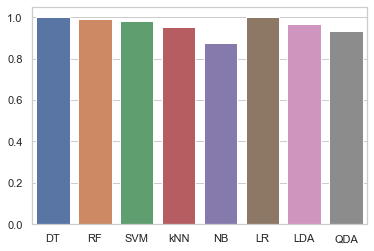

In [117]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid", color_codes=True)
print(li_y)
sns.barplot(x= li_x, y= li_y)

#### **Give 18 inputs according to following:** <br>

A1 -> Does the patient loot at you when you call his/her name? (yes:1, NO:0) <br>
A2 -> Does the patient have repetitive behaviour? (yes:1, NO:0) <br>
A3 -> Does the patient point to indicate that he/she wants something? (yes:1, NO:0) <br>
A4 -> Is the patient facing difficulty realting to people? (yes:1, NO:0) <br>
A5 -> Does the adult have obsessive interest? (yes:1, NO:0) <br>
A6 -> Does the patient have social anxiety?  (yes:1, NO:0) <br>
A7 -> Is there lack of social skills in the patient? (yes:1, NO:0) <br>
A8 -> Does the patient face difficulty in eye contact? (yes:1, NO:0) <br>
A9 -> Do the patient have repetitive behaviour? (yes:1, NO:0) <br>
A10 -> Does the patient have bad executive function? (yes:1, NO:0) <br>
<br>
What is the patient relation with who is giving this test? -> Health care professional:1, others:2, parent:3, Relative:4, self:5 <br>
<br>
What is the patient's age? -> 18 and more:1, Less than 18:0 <br>
have you used this app before? -> Yes:1, No:0 <br>

What is the country of residence of the patient?  -> <br>
<br>
United States	0	Sierra Leone	30 <br>
Brazil	1	Ethiopia	31 <br>
Spain	2	Viet Nam	32 <br>
New Zealand	3	Iran	33 <br>
Bahamas	4	Costa Rica	34 <br>
Burundi	5	Germany	35 <br>
Jordan	6	Mexico	36 <br>
Ireland	7	Armenia	37 <br>
United Arabs Emirates	8	Iceland	38 <br>
Afghanistan	9	Nicaragua	39 <br>
United Kingdom	10	Austria	40 <br>
South Africa	11	Russia	41 <br>
Italy	12	AmericanSamoa	42 <br>
Pakisthan	13	Uruguay	43 <br>
Egypt	14	Ukraine	44 <br>
Bangladesh	15	Serbia	45 <br>
Chile	16	Portugal	46 <br>
France	17	Malaysia	47 <br>
China	18	Ecuador	48 <br>
Australia	19	Niger	49 <br>
Canada	20	Belhium	50 <br>
Saudi Arabia	21	Bolivia	51 <br>
Netherlands	22	Aruba	52 <br>
Romania	23	Finland	53 <br>
Sweden	24	Turkey	54 <br>
Tonga	25	Nepal	55 <br>
Oman 	26	Indonesia	56 <br>
India	27	Angola	57 <br>
Philippines	28	Czech Republic	58 <br>
Sri Lanka	29	Cyprus	59 <br>
<br>

Have u had Autism before?  ->  Yes:1, No:0 <br>
Is the patient born with jaundice? ->  Yes:1, No:0<br>
<br>
What is the ethnicity of the patient? -> <br>
White-European:0 <br>
Latino:1 <br>
Others,others:2 <br>
Black:3 <br>
Asian:4 <br>
Middle Eastern:5 <br>
Pasifika: 6 <br>
South Asian:7 <br>
Hispanic:8 <br>
Turkish:9 <br>

What is the gender of patient? -> f:0, m:1

In [118]:
l = [[1,0,1,1,1,1,0,0,0,1,5,1,0,27,0,0,4,0]]

In [119]:
predict = dectree.predict(l)

In [120]:
# print(predict)
if predict==1:
   print("Patient is having ASD.")
else:
    print("Patient is not having ASD.")

Patient is not having ASD.


In [121]:
import pickle
pickle.dump(logreg, open('modellr.pkl', 'wb'))